In [1]:
# simple reinformcent learning example
# 1-dimensional maze

# accompanies blog writing up algorithmic art meetup on reinforcement learning
# https://www.meetup.com/Algorithmic-Art/events/261462857/

In [2]:
import numpy
import pandas
import random

In [3]:
# Q state-action table, initialised with zeros
Q = pandas.DataFrame(numpy.zeros((2,6)), index=[-1, 1])

# print initial Q (state, action) table
Q

,0,1,2,3,4,5
-1,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# run several iterations to iteratively estimate Q-values

# number of iterations (actions)
iterations = 20

# initial position
xpos = 3

for i in range(iterations):
    print("xpos = ",xpos)
    
    # consider all actions
    for action in [-1,1]:
        xpos2 = xpos+action
        # if xpos2 is outside maze, continue
        if ((xpos2 < 0) or (xpos2 > 5)):
            continue
        
        # reward is at position 5
        reward = 0
        if (xpos2 == 5):
            reward = 1
            pass
        
        # max Q from next state
        maxQ2 = max(Q[xpos2])
        
        # update Q-table
        Q.loc[action,xpos] = reward + 0.9 * maxQ2
        
        pass
    
    # set new position position according to random walk policy
    xpos_new = xpos + random.choice([-1, 1])
    # check new position doesn't fall outside maze bounds
    xpos_new = numpy.clip(xpos_new, 0, 5)
    # also check it doesn't hit goals or barriers
    if xpos_new in [5]:
        xpos_new = xpos
        pass
    # update position
    xpos = xpos_new
    
    print(Q)
    print("")
    
    pass


xpos =  3
      0    1    2    3    4    5
-1  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  0.0  0.0

xpos =  4
      0    1    2    3    4    5
-1  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  1.0  0.0

xpos =  4
      0    1    2    3    4    5
-1  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  1.0  0.0

xpos =  4
      0    1    2    3    4    5
-1  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  1.0  0.0

xpos =  4
      0    1    2    3    4    5
-1  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0  1.0  0.0

xpos =  3
      0    1    2    3    4    5
-1  0.0  0.0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.9  1.0  0.0

xpos =  4
      0    1    2    3     4    5
-1  0.0  0.0  0.0  0.0  0.81  0.0
 1  0.0  0.0  0.0  0.9  1.00  0.0

xpos =  3
      0    1    2    3     4    5
-1  0.0  0.0  0.0  0.0  0.81  0.0
 1  0.0  0.0  0.0  0.9  1.00  0.0

xpos =  2
      0    1     2    3     4    5
-1  0.0  0.0  0.00  0.0  0.81  0.0
 1  0.0  0.0  0.81  0.9  1.00  0.0

In [5]:
# print state table

Q

,0,1,2,3,4,5
-1,0.0,0.000,0.6561,0.729,0.81,0.0
1,0.0,0.729,0.8100,0.900,1.00,0.0


In [6]:
# visualise the Q-value table

import seaborn as sns

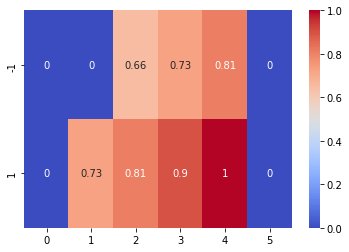

In [7]:
sns.heatmap(Q, cmap='coolwarm', annot=True)